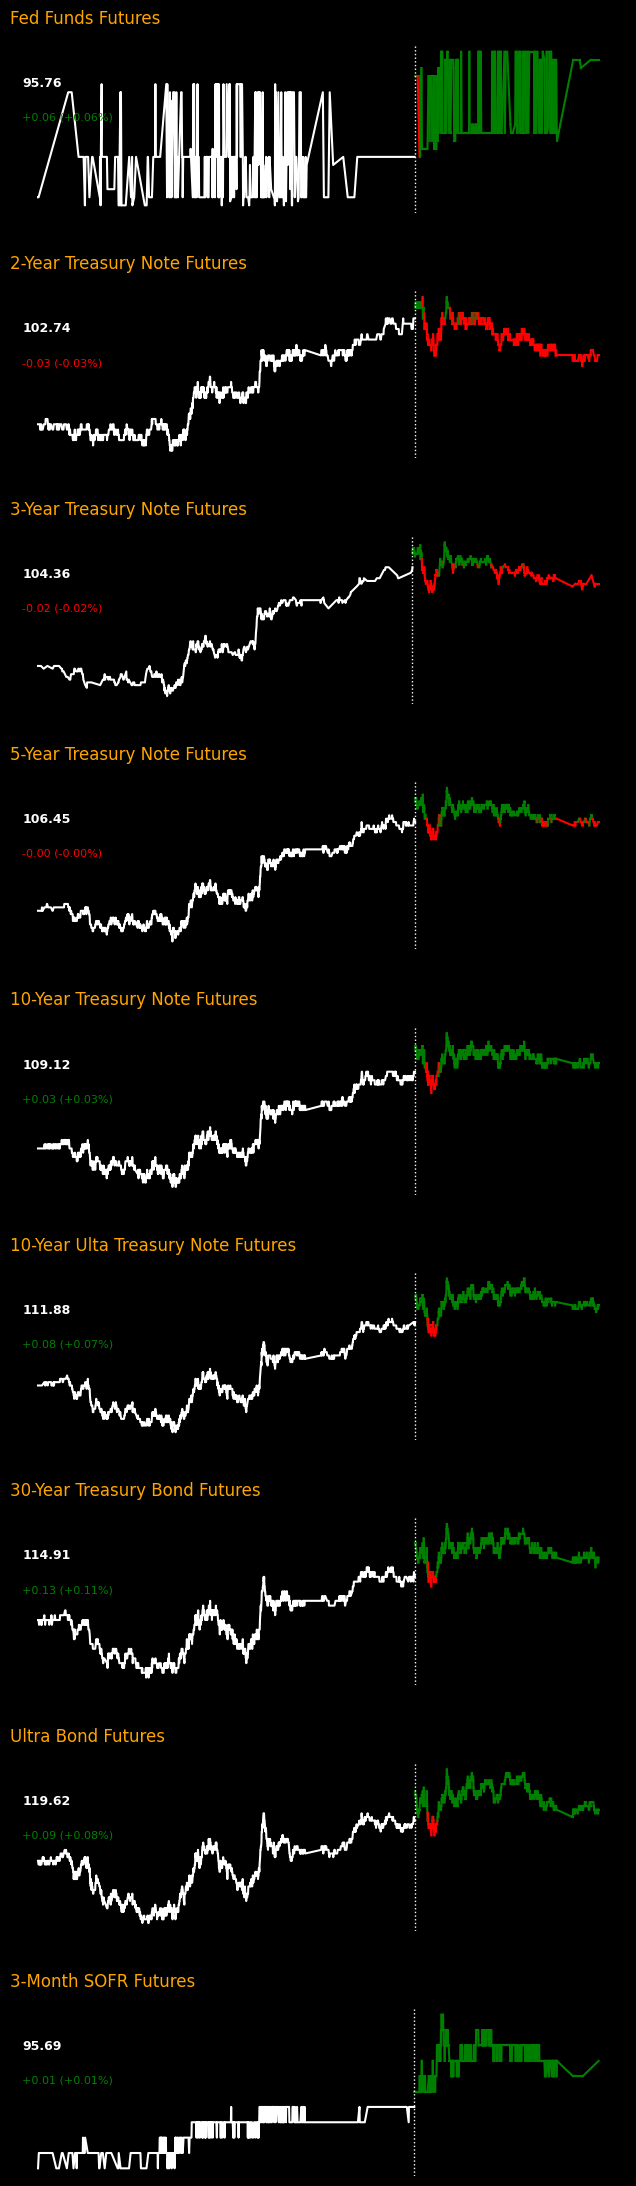

In [1]:
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd

# Function to create a sparkline chart for a single rate future
def compact_stock_sparkline_plot(symbol, ax):
    # Fetch data for the past 5 days
    equity = yf.Ticker(symbol)
    df = equity.history(period="5d", interval="1m")

    # Ensure there's sufficient data
    if df.empty:
        ax.text(0.5, 0.5, "No Data", color="white", fontsize=10, ha="center", va="center")
        return

    # Convert index to EST timezone (U.S. market hours for rate futures)
    df.index = df.index.tz_convert("US/Eastern")

    # Split data by dates
    grouped = list(df.groupby(df.index.date))
    if len(grouped) < 2:
        ax.text(0.5, 0.5, "Insufficient Data", color="white", fontsize=10, ha="center", va="center")
        return

    # Get the last two sessions
    last_session = grouped[-2][1]  # Second-to-last session
    next_session = grouped[-1][1]  # Last session

    # Ensure we start the next session after 8 AM EST (pre-market open)
    next_session = next_session[next_session.index.time >= pd.Timestamp("08:00:00").time()]

    # Shift the second session to follow the first seamlessly
    if not next_session.empty:
        last_time = last_session.index[-1]
        time_shift = last_time - next_session.index[0]
        next_session.index = next_session.index + time_shift

    # Get baseline (last closing price of the first session)
    baseline = last_session['Close'].iloc[-1]

    # Get current price and change metrics
    current_price = round(next_session['Close'].iloc[-1], 2)
    price_change = round(current_price - baseline, 2)
    percent_change = round((price_change / baseline) * 100, 2)

    # Define colors for the text
    change_color = "green" if price_change > 0 else "red"

    # Plot the data
    ax.plot(last_session.index, last_session['Close'], color="white", linewidth=1.5, label="Session 1")
    for i in range(1, len(next_session)):
        color = "green" if next_session['Close'].iloc[i] > baseline else "red"
        ax.plot(next_session.index[i-1:i+1], next_session['Close'].iloc[i-1:i+1], color=color, linewidth=1.5)

    # Add a dotted line separating the sessions
    ax.axvline(x=next_session.index[0], color="white", linestyle="dotted", linewidth=1)

    # Remove axes for a clean sparkline look
    ax.axis('off')

    # Add annotations for price and changes, positioned away from the sparkline
    ax.text(0.02, 0.75, f"{current_price:.2f}", color="white", fontsize=9, weight="bold", transform=ax.transAxes)
    ax.text(0.02, 0.55, f"{price_change:+.2f} ({percent_change:+.2f}%)", color=change_color, fontsize=8, transform=ax.transAxes)

# Define Rate Futures in the updated order
rate_futures = {
    "Fed Funds Futures": "ZQ=F",
    "2-Year Treasury Note Futures": "ZT=F",
    "3-Year Treasury Note Futures": "Z3N=F",
    "5-Year Treasury Note Futures": "ZF=F",
    "10-Year Treasury Note Futures": "ZN=F",
    "10-Year Ulta Treasury Note Futures": "TN=F",
    "30-Year Treasury Bond Futures": "ZB=F",
    "Ultra Bond Futures": "UB=F",
    "3-Month SOFR Futures": "SR3=F",
}

# Create the Rate Futures Dashboard
def create_rate_futures_dashboard():
    fig, axes = plt.subplots(
        nrows=len(rate_futures),
        figsize=(7, len(rate_futures) * 2.5),  # Adjust vertical space
        facecolor="black",
    )
    for ax, (name, symbol) in zip(axes, rate_futures.items()):
        ax.set_title(name, color="orange", fontsize=12, loc="left", pad=15)
        compact_stock_sparkline_plot(symbol, ax)
    plt.tight_layout(pad=3)  # Increased padding between plots
    plt.show()

# Generate the dashboard
create_rate_futures_dashboard()

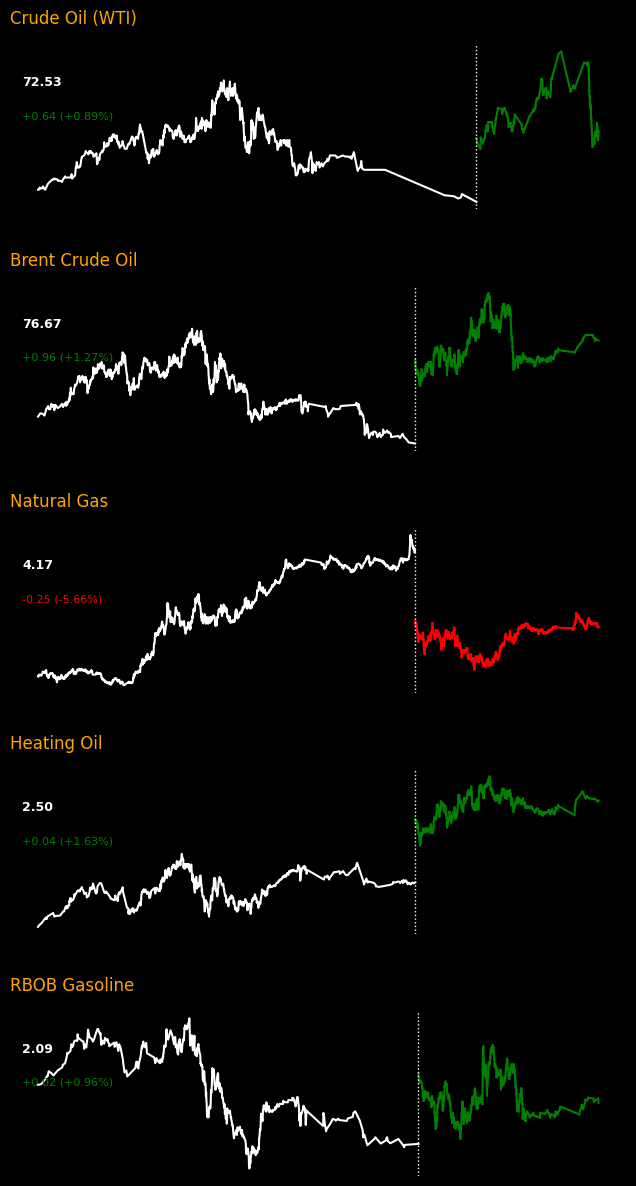

In [2]:
# Energy Futures Dashboard
def create_energy_futures_dashboard():
    energy_futures = {
        "Crude Oil (WTI)": "CL=F",
        "Brent Crude Oil": "BZ=F",
        "Natural Gas": "NG=F",
        "Heating Oil": "HO=F",
        "RBOB Gasoline": "RB=F",
    }

    fig, axes = plt.subplots(
        nrows=len(energy_futures),
        figsize=(7, len(energy_futures) * 2.5),  # Adjust vertical space
        facecolor="black",
    )
    for ax, (name, symbol) in zip(axes, energy_futures.items()):
        ax.set_title(name, color="orange", fontsize=12, loc="left", pad=15)
        compact_stock_sparkline_plot(symbol, ax)
    plt.tight_layout(pad=3)
    plt.show()

# Generate the Energy Futures Dashboard
create_energy_futures_dashboard()

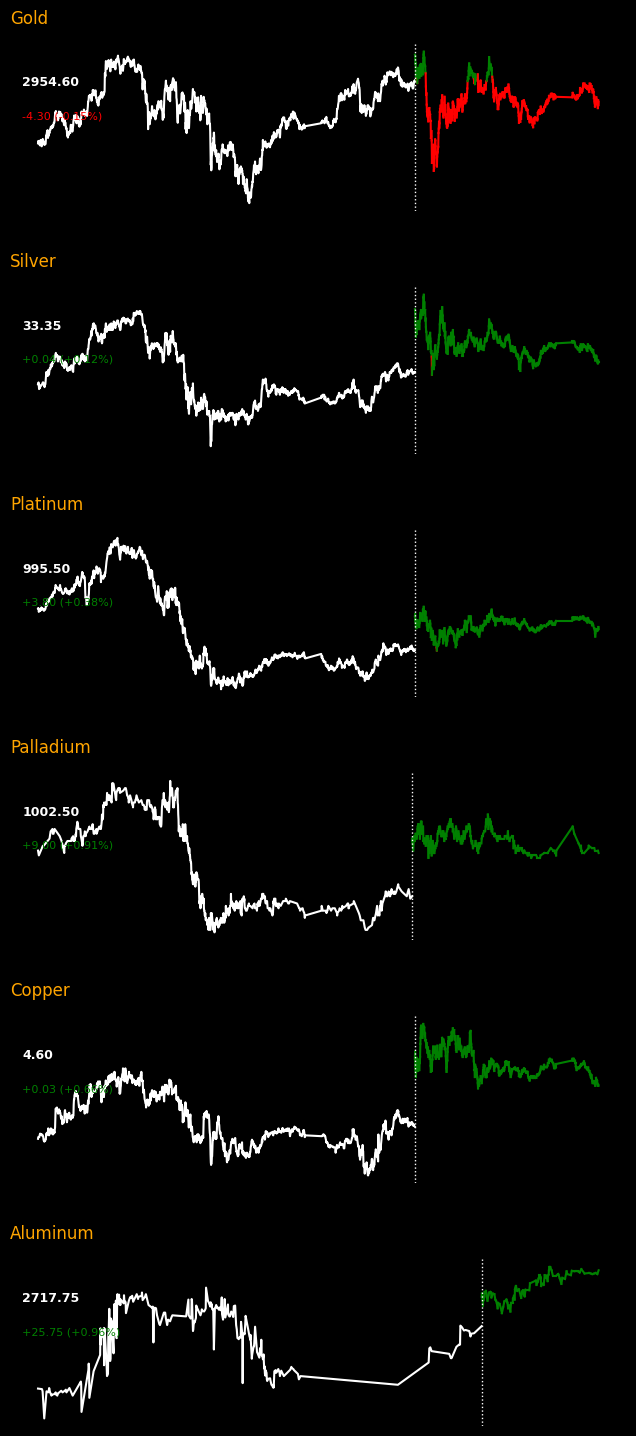

In [3]:
# Metal Futures Dashboard
def create_metal_futures_dashboard():
    metal_futures = {
        "Gold": "GC=F",
        "Silver": "SI=F",
        "Platinum": "PL=F",
        "Palladium": "PA=F",
        "Copper": "HG=F",
        "Aluminum": "ALI=F",

    }

    fig, axes = plt.subplots(
        nrows=len(metal_futures),
        figsize=(7, len(metal_futures) * 2.5),  # Adjust vertical space
        facecolor="black",
    )
    for ax, (name, symbol) in zip(axes, metal_futures.items()):
        ax.set_title(name, color="orange", fontsize=12, loc="left", pad=15)
        compact_stock_sparkline_plot(symbol, ax)
    plt.tight_layout(pad=3)
    plt.show()

# Generate the Metal Futures Dashboard
create_metal_futures_dashboard()

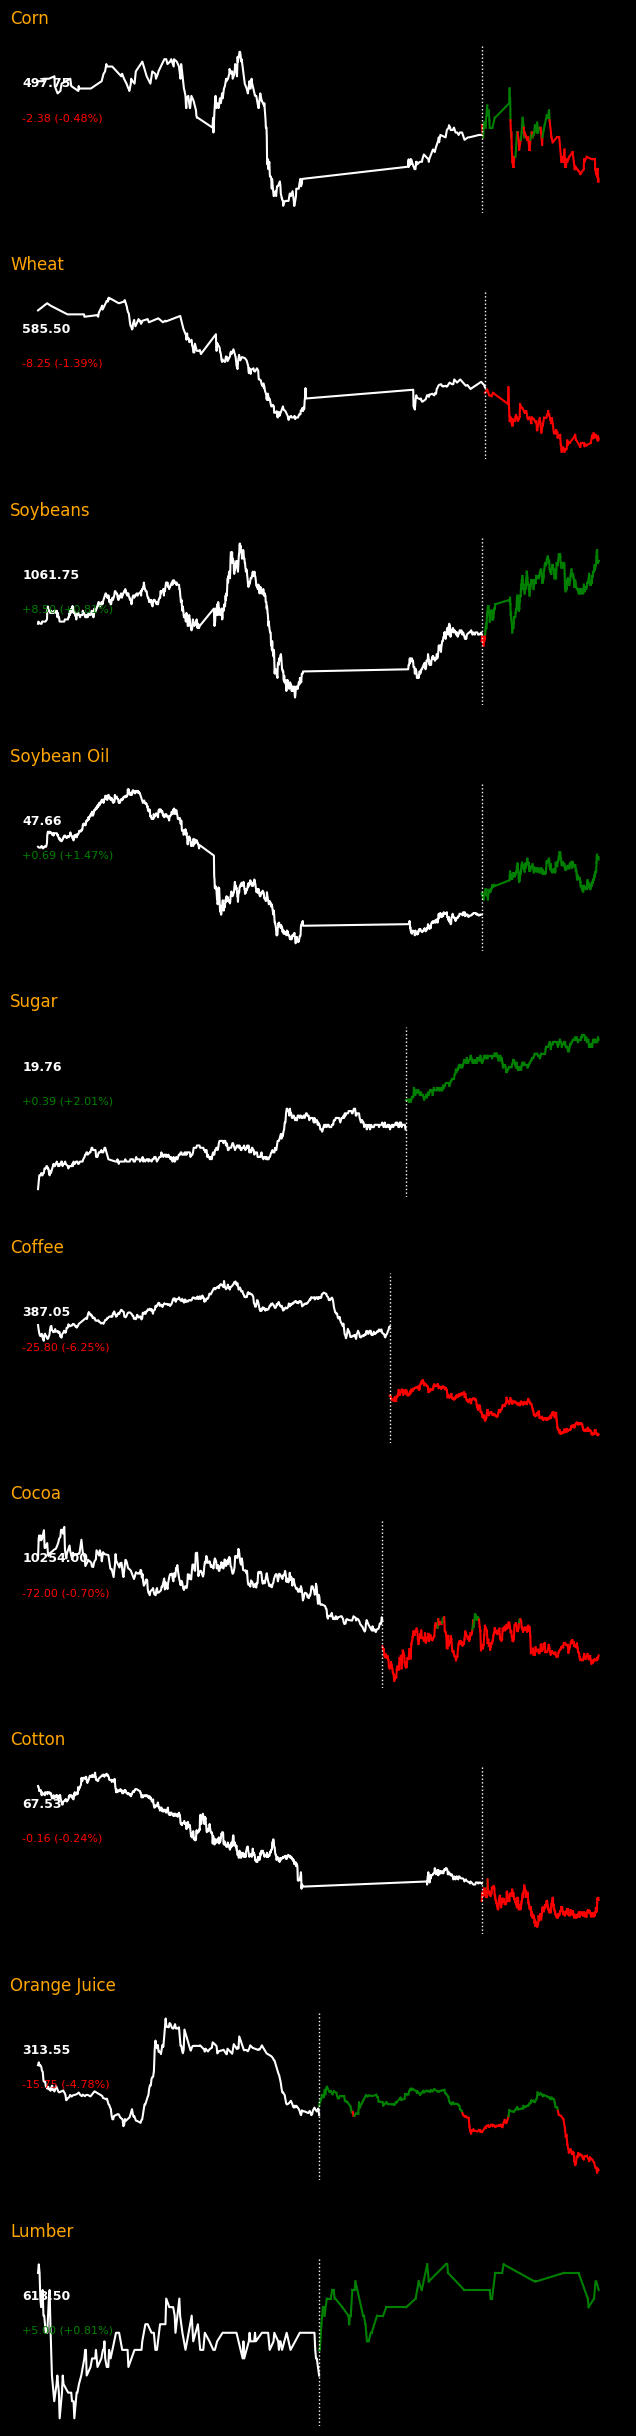

In [4]:
# Agricultural (Agg) Futures Dashboard
def create_agg_futures_dashboard():
    agg_futures = {
        "Corn": "XC=F",
        "Wheat": "XW=F",
        "Soybeans": "ZSK25.CBT",
        "Soybean Oil": "ZLK25.CBT",
        "Sugar": "SBK25.NYB",
        "Coffee": "KCK25.NYB",
        "Cocoa": "CC=F",
        "Cotton": "CTK25.NYB",
        "Orange Juice": "OJK25.NYB",
        "Lumber": "LBR=F",
    }

    fig, axes = plt.subplots(
        nrows=len(agg_futures),
        figsize=(7, len(agg_futures) * 2.5),  # Adjust vertical space
        facecolor="black",
    )
    for ax, (name, symbol) in zip(axes, agg_futures.items()):
        ax.set_title(name, color="orange", fontsize=12, loc="left", pad=15)
        compact_stock_sparkline_plot(symbol, ax)
    plt.tight_layout(pad=3)
    plt.show()

# Generate the Agricultural Futures Dashboard
create_agg_futures_dashboard()

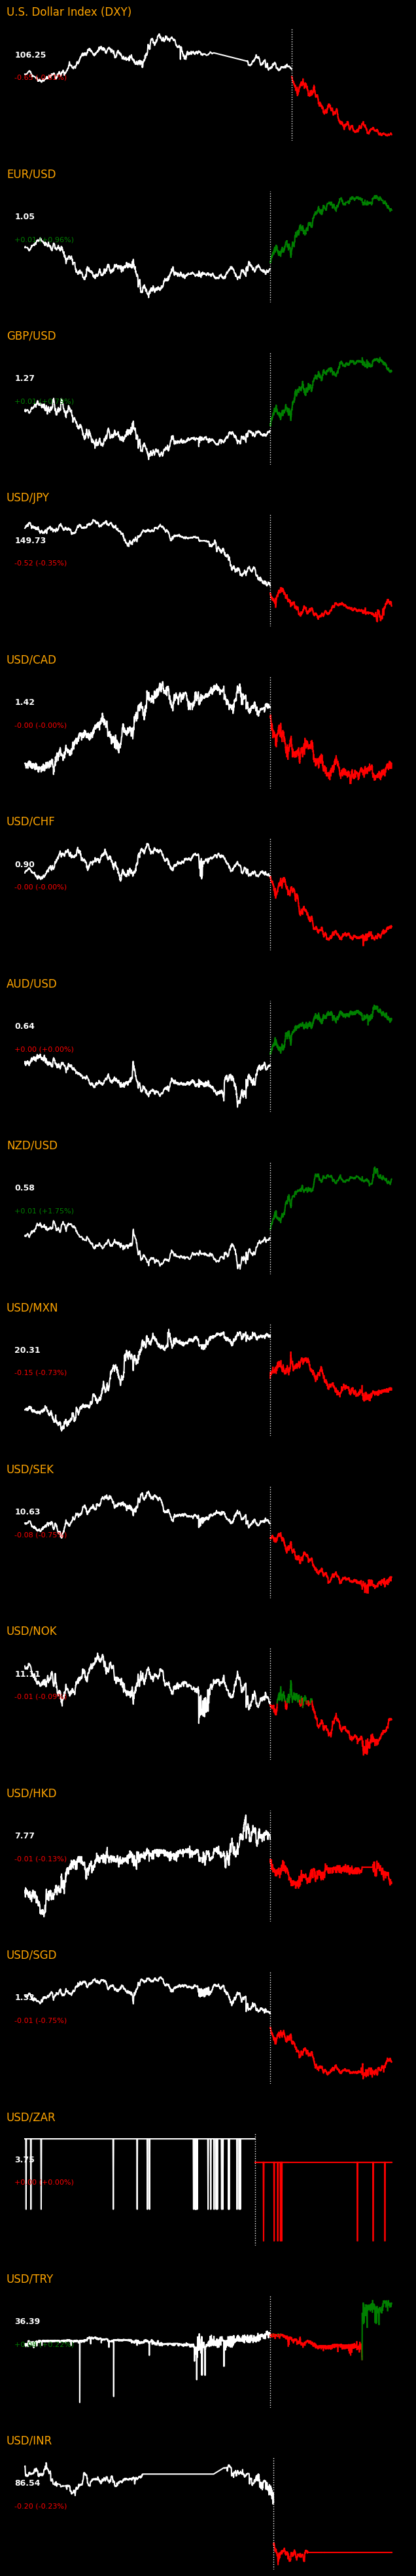

In [5]:
# Currency Spot Markets & DXY Dashboard
def create_currency_dashboard():
    currency_pairs = {
        "U.S. Dollar Index (DXY)": "DX=F",
        "EUR/USD": "EURUSD=X",
        "GBP/USD": "GBPUSD=X",
        "USD/JPY": "USDJPY=X",
        "USD/CAD": "USDCAD=X",
        "USD/CHF": "USDCHF=X",
        "AUD/USD": "AUDUSD=X",
        "NZD/USD": "NZDUSD=X",
        "USD/MXN": "USDMXN=X",
        "USD/SEK": "USDSEK=X",
        "USD/NOK": "USDNOK=X",
        "USD/HKD": "USDHKD=X",
        "USD/SGD": "USDSGD=X",
        "USD/ZAR": "USDSAR=X",
        "USD/TRY": "USDTRY=X",
        "USD/INR": "USDINR=X",
    }

    fig, axes = plt.subplots(
        nrows=len(currency_pairs),
        figsize=(7, len(currency_pairs) * 2.5),  # Adjust vertical space
        facecolor="black",
    )
    for ax, (name, symbol) in zip(axes, currency_pairs.items()):
        ax.set_title(name, color="orange", fontsize=12, loc="left", pad=15)
        compact_stock_sparkline_plot(symbol, ax)
    plt.tight_layout(pad=3)  # Increased padding between plots
    plt.show()

# Generate the Currency Dashboard
create_currency_dashboard()

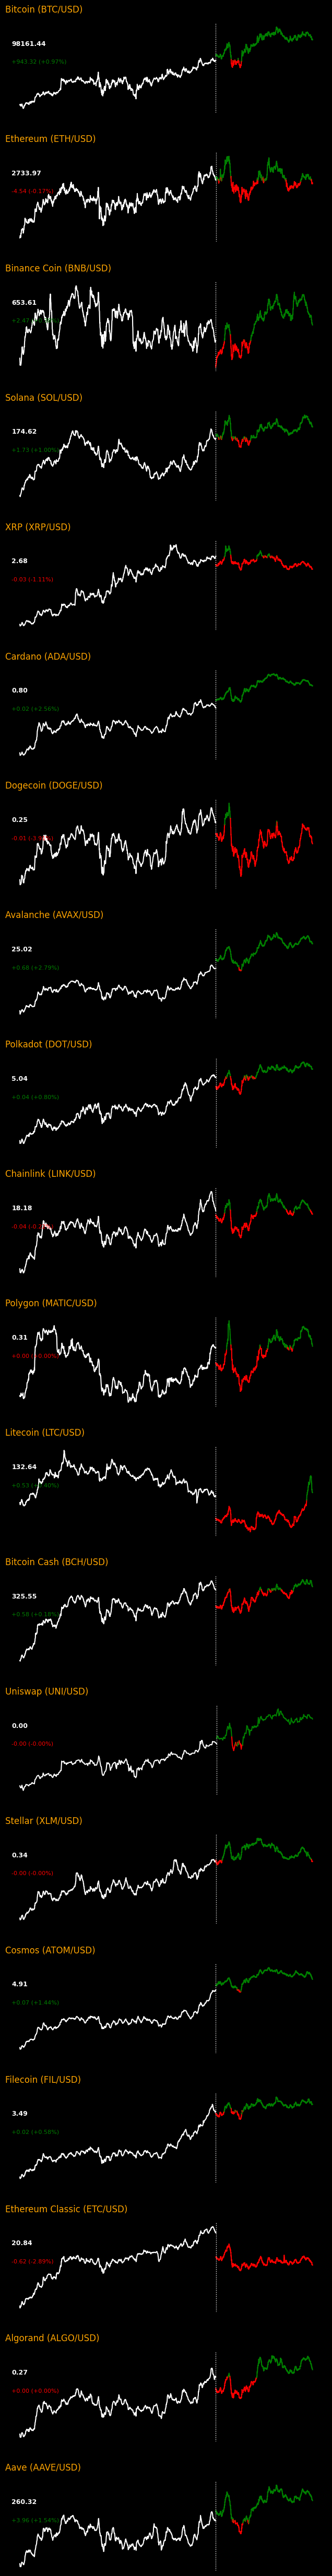

In [6]:
# Major Cryptocurrencies Dashboard
def create_crypto_dashboard():
    crypto_pairs = {
        "Bitcoin (BTC/USD)": "BTC-USD",
        "Ethereum (ETH/USD)": "ETH-USD",
        "Binance Coin (BNB/USD)": "BNB-USD",
        "Solana (SOL/USD)": "SOL-USD",
        "XRP (XRP/USD)": "XRP-USD",
        "Cardano (ADA/USD)": "ADA-USD",
        "Dogecoin (DOGE/USD)": "DOGE-USD",
        "Avalanche (AVAX/USD)": "AVAX-USD",
        "Polkadot (DOT/USD)": "DOT-USD",
        "Chainlink (LINK/USD)": "LINK-USD",
        "Polygon (MATIC/USD)": "MATIC-USD",
        "Litecoin (LTC/USD)": "LTC-USD",
        "Bitcoin Cash (BCH/USD)": "BCH-USD",
        "Uniswap (UNI/USD)": "UNI-USD",
        "Stellar (XLM/USD)": "XLM-USD",
        "Cosmos (ATOM/USD)": "ATOM-USD",
        "Filecoin (FIL/USD)": "FIL-USD",
        "Ethereum Classic (ETC/USD)": "ETC-USD",
        "Algorand (ALGO/USD)": "ALGO-USD",
        "Aave (AAVE/USD)": "AAVE-USD",
    }

    fig, axes = plt.subplots(
        nrows=len(crypto_pairs),
        figsize=(7, len(crypto_pairs) * 2.5),  # Adjust vertical space
        facecolor="black",
    )
    for ax, (name, symbol) in zip(axes, crypto_pairs.items()):
        ax.set_title(name, color="orange", fontsize=12, loc="left", pad=15)
        compact_stock_sparkline_plot(symbol, ax)
    plt.tight_layout(pad=3)  # Increased padding between plots
    plt.show()

# Generate the Crypto Dashboard
create_crypto_dashboard()

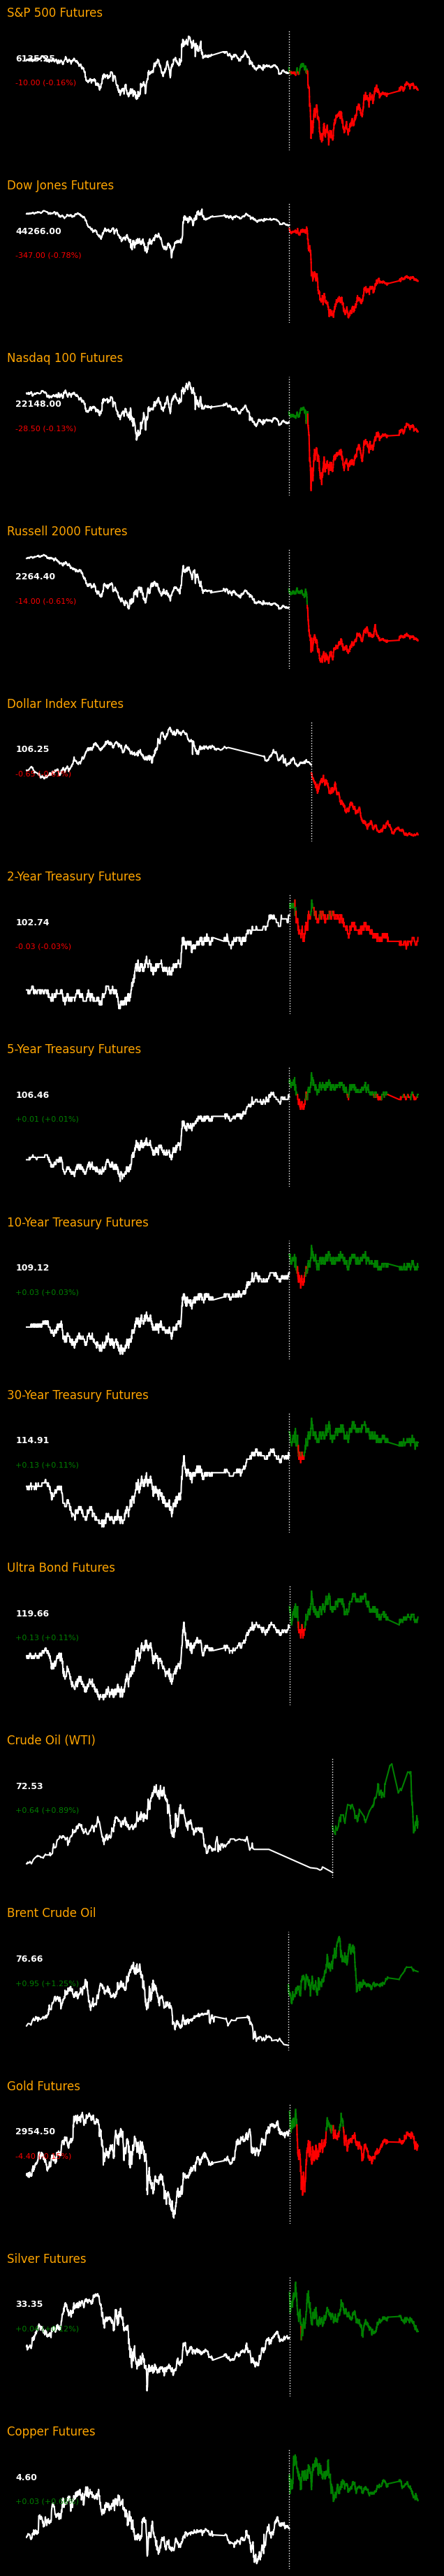

In [7]:
# U.S. Futures Dashboard
def create_us_futures_dashboard():
    us_futures = {
        # Major Equity Index Futures
        "S&P 500 Futures": "ES=F",
        "Dow Jones Futures": "YM=F",
        "Nasdaq 100 Futures": "NQ=F",
        "Russell 2000 Futures": "RTY=F",
        "Dollar Index Futures": "DX=F",
        # U.S. Treasury Futures
        "2-Year Treasury Futures": "ZT=F",
        "5-Year Treasury Futures": "ZF=F",
        "10-Year Treasury Futures": "ZN=F",
        "30-Year Treasury Futures": "ZB=F",
        "Ultra Bond Futures": "UB=F",
        # Major Commodity Futures
        "Crude Oil (WTI)": "CL=F",
        "Brent Crude Oil": "BZ=F",
        "Gold Futures": "GC=F",
        "Silver Futures": "SI=F",
        "Copper Futures": "HG=F",
    }

    fig, axes = plt.subplots(
        nrows=len(us_futures),
        figsize=(7, len(us_futures) * 2.5),  # Adjust vertical space
        facecolor="black",
    )
    for ax, (name, symbol) in zip(axes, us_futures.items()):
        ax.set_title(name, color="orange", fontsize=12, loc="left", pad=15)
        compact_stock_sparkline_plot(symbol, ax)
    plt.tight_layout(pad=3)  # Increased padding between plots
    plt.show()

# Generate the U.S. Futures Dashboard
create_us_futures_dashboard()

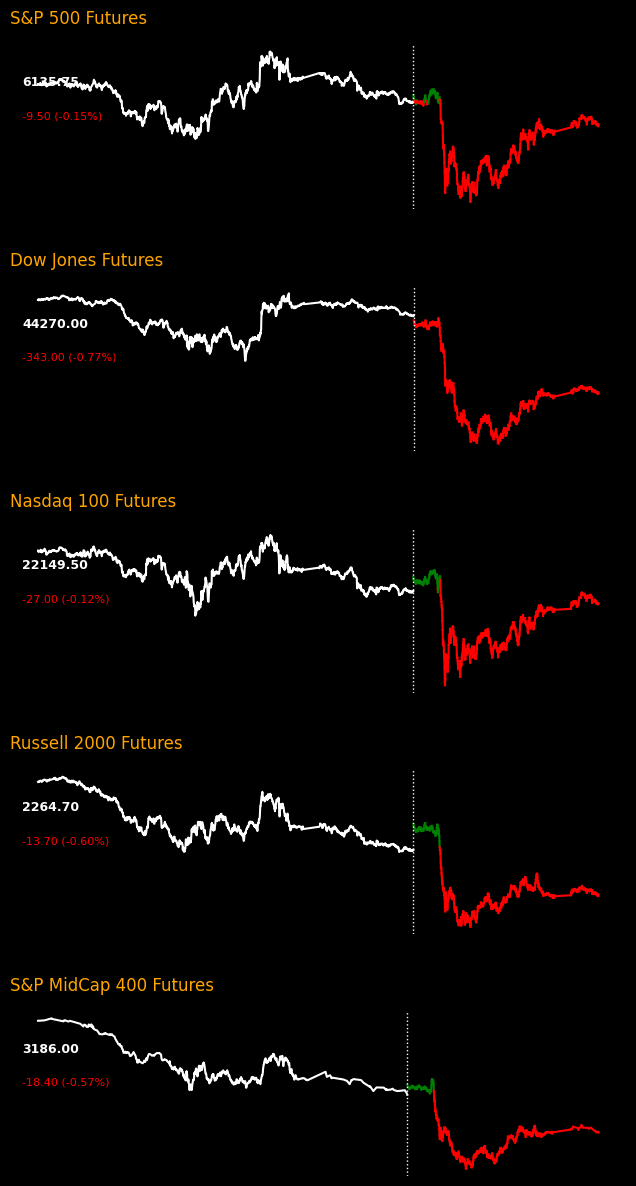

In [9]:
# U.S. Equity Futures Dashboard
def create_us_equity_futures_dashboard():
    equity_futures = {
        "S&P 500 Futures": "ES=F",
        "Dow Jones Futures": "YM=F",
        "Nasdaq 100 Futures": "NQ=F",
        "Russell 2000 Futures": "RTY=F",
        "S&P MidCap 400 Futures": "EMD=F",
    }

    fig, axes = plt.subplots(
        nrows=len(equity_futures),
        figsize=(7, len(equity_futures) * 2.5),  # Adjust vertical space
        facecolor="black",
    )

    for ax, (name, symbol) in zip(axes, equity_futures.items()):
        ax.set_title(name, color="orange", fontsize=12, loc="left", pad=15)
        compact_stock_sparkline_plot(symbol, ax)

    plt.tight_layout(pad=3)  # Increased padding between plots
    plt.show()

# Generate the U.S. Equity Futures Dashboard
create_us_equity_futures_dashboard()

In [2]:
pip install yfinance --upgrade

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.7/108.7 kB 2.7 MB/s eta 0:00:00
  Attempting uninstall: yfinance
    Found existing installation: yfinance 0.2.52
    Uninstalling yfinance-0.2.52:
      Successfully uninstalled yfinance-0.2.52
